# ML Experiment Execution

This notebook demonstrates running experiments using the reproducible pipeline.


In [1]:
import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))

import numpy as np
import pandas as pd
import yaml
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from pipeline import MLPipeline
import matplotlib.pyplot as plt

np.random.seed(42)
plt.style.use('seaborn-v0_8-darkgrid')


In [2]:
# Load data
housing = fetch_california_housing(as_frame=True)
X = housing.data.values
y = housing.target.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")


Training set: (16512, 8)
Test set: (4128, 8)


## Experiment 1: Linear Regression


In [3]:
# Create pipeline for experiment 1
config1 = {
    'random_seed': 42,
    'model_type': 'linear_regression'
}

pipeline1 = MLPipeline(config1, experiment_name='exp1_linear_regression')
pipeline1.save_config()

# Train model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model1 = LinearRegression()
model1.fit(X_train_scaled, y_train)

# Evaluate
y_pred1 = model1.predict(X_test_scaled)
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

# Log metrics
pipeline1.log_metric('test_mse', mse1)
pipeline1.log_metric('test_rmse', np.sqrt(mse1))
pipeline1.log_metric('test_r2', r2_1)

# Save model and results
pipeline1.save_model(model1)
pipeline1.save_results()

print(f"Experiment 1 Results:")
print(f"  MSE: {mse1:.4f}")
print(f"  RMSE: {np.sqrt(mse1):.4f}")
print(f"  R²: {r2_1:.4f}")
print(f"  Experiment saved to: {pipeline1.exp_dir}")


Experiment 1 Results:
  MSE: 0.5559
  RMSE: 0.7456
  R²: 0.5758
  Experiment saved to: experiments\exp1_linear_regression


## Experiment 2: Ridge Regression


In [4]:
# Create pipeline for experiment 2
config2 = {
    'random_seed': 42,
    'model_type': 'ridge_regression',
    'alpha': 0.1
}

pipeline2 = MLPipeline(config2, experiment_name='exp2_ridge_regression')
pipeline2.save_config()

# Train model
model2 = Ridge(alpha=0.1)
model2.fit(X_train_scaled, y_train)

# Evaluate
y_pred2 = model2.predict(X_test_scaled)
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

# Log metrics
pipeline2.log_metric('test_mse', mse2)
pipeline2.log_metric('test_rmse', np.sqrt(mse2))
pipeline2.log_metric('test_r2', r2_2)

# Save model and results
pipeline2.save_model(model2)
pipeline2.save_results()

print(f"Experiment 2 Results:")
print(f"  MSE: {mse2:.4f}")
print(f"  RMSE: {np.sqrt(mse2):.4f}")
print(f"  R²: {r2_2:.4f}")
print(f"  Experiment saved to: {pipeline2.exp_dir}")


Experiment 2 Results:
  MSE: 0.5559
  RMSE: 0.7456
  R²: 0.5758
  Experiment saved to: experiments\exp2_ridge_regression


EXPERIMENT COMPARISON
       Experiment      MSE     RMSE       R²
Linear Regression 0.555892 0.745581 0.575788
 Ridge Regression 0.555888 0.745579 0.575791


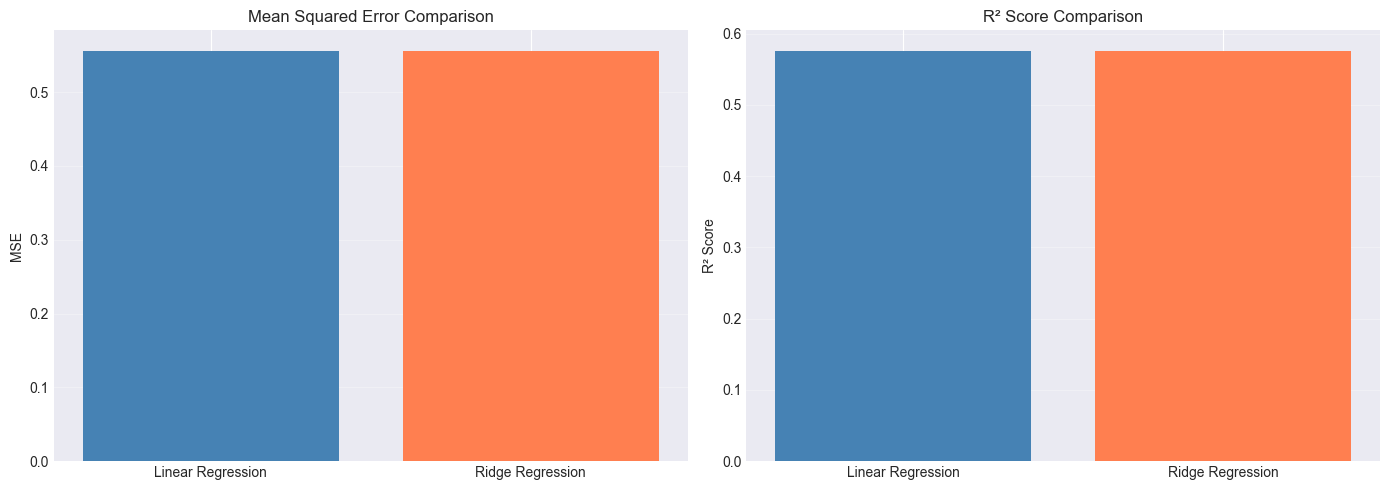

In [5]:
# Compare experiments
comparison = pd.DataFrame({
    'Experiment': ['Linear Regression', 'Ridge Regression'],
    'MSE': [mse1, mse2],
    'RMSE': [np.sqrt(mse1), np.sqrt(mse2)],
    'R²': [r2_1, r2_2]
})

print("EXPERIMENT COMPARISON")
print("=" * 60)
print(comparison.to_string(index=False))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(comparison['Experiment'], comparison['MSE'], 
            color=['steelblue', 'coral'])
axes[0].set_ylabel('MSE')
axes[0].set_title('Mean Squared Error Comparison')
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(comparison['Experiment'], comparison['R²'], 
            color=['steelblue', 'coral'])
axes[1].set_ylabel('R² Score')
axes[1].set_title('R² Score Comparison')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()
